In [5]:
import numpy as np
import matplotlib.pyplot as plt


try:
    import mplhep as hep
    hep.style.use("LHCb2")
except:
    print("mplhep not found. Falling back to default plot style")



In [6]:
# solutionsFile = './solution_FO.csv'
solutionsFile = './solution_Coann.csv'

In [7]:
data = np.genfromtxt(solutionsFile,delimiter=',',names=True)
omTot = 0.0
ylabels = []
for label in data.dtype.names:
    if label == 'x':
        continue
    if label[0] != 'Y':
        continue
    ylabels.append(label)
    omh2 = 0.12*(data[label][-1])/(6.8e-13)
    print(f'Omega*h^2 ({label}) = {omh2:1.4g}')
    omTot += omh2
print(f'Omega*h^2 = {omTot:1.4g}')

Omega*h^2 (Yb1) = 3.234e-21
Omega*h^2 (Yxd) = 0.7086
Omega*h^2 = 0.7086


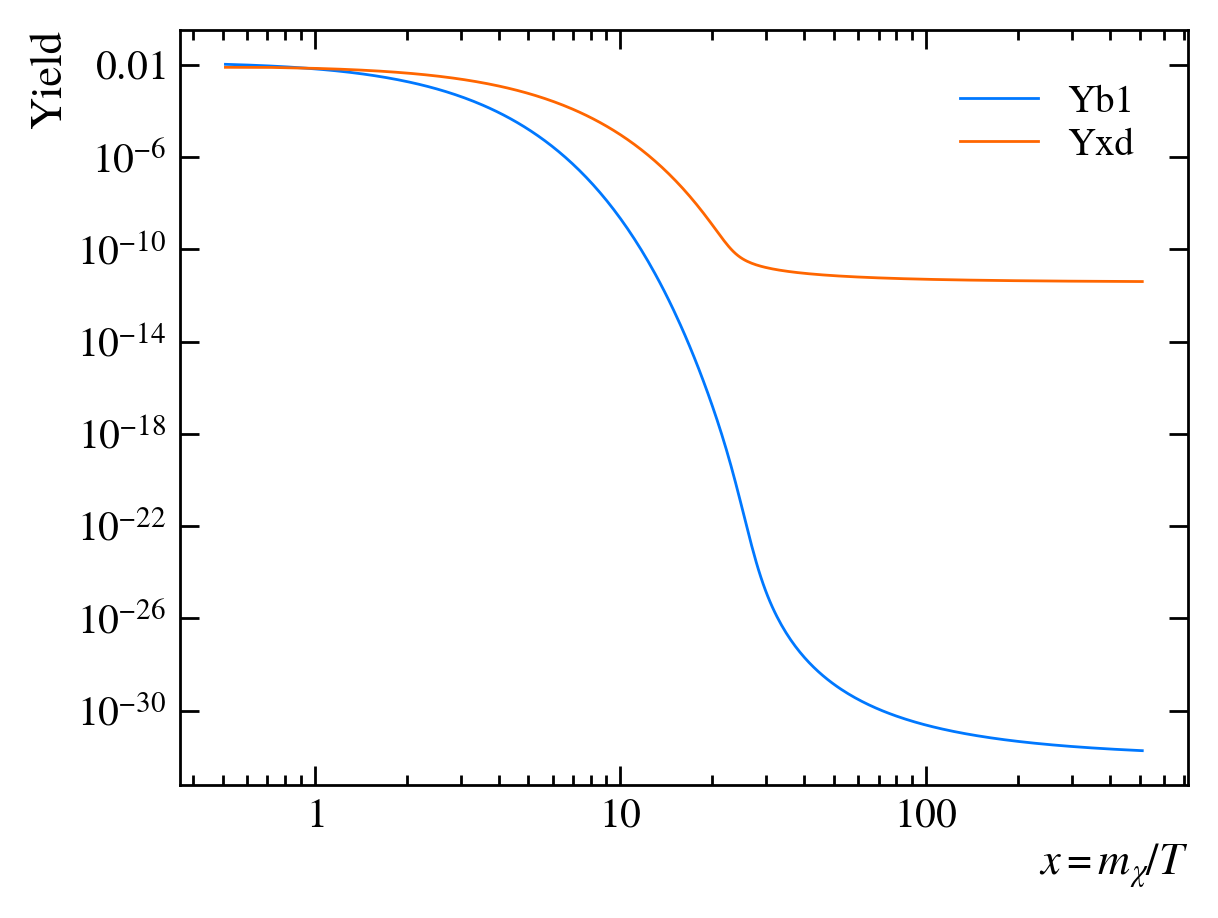

In [9]:
# fig = plt.figure(figsize=(10,8))
for label in ylabels:
    plt.plot(data['x'],data[label], linewidth=2, label = label)

plt.xlabel(r'$x = m_{\chi}/T$')
plt.ylabel('Yield')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()